In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
# 尝试多种中文字体
chinese_fonts = [
    'SimHei',           # 黑体
    'Microsoft YaHei',  # 微软雅黑
    'Arial Unicode MS', # Mac系统
    'DejaVu Sans',      # Linux
    'WenQuanYi Micro Hei', # 文泉驿
    'Source Han Sans CN',  # 思源黑体
    'FangSong',         # 仿宋
    'KaiTi',            # 楷体
    'SimSun',           # 宋体
    'sans-serif'        # 最后备选
]

# 设置字体
plt.rcParams['font.sans-serif'] = chinese_fonts
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12


def load_and_analyze_data():
    """加载并分析真实在线零售数据"""

    print("=== 开始电商数据分析项目 ===")

    # 加载数据
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

    try:
        df = pd.read_excel(url)
        print("✅ 成功加载UCI在线零售数据集！")
        return df
    except Exception as e:
        print(f"加载失败: {e}")
        return None

# 加载数据
df = load_and_analyze_data()

if df is not None:
    print(f"📊 原始数据概览:")
    print(f"数据形状: {df.shape}")
    print(f"数据基本信息：{df.info()}")
    print(f"数据字段: {df.columns.tolist()}")
    print(f"\n前5行数据:")
    print(df.head())

=== 开始电商数据分析项目 ===
✅ 成功加载UCI在线零售数据集！
📊 原始数据概览:
数据形状: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
数据基本信息：None
数据字段: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

前5行数据:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING 

In [37]:
def clean_retail_data(df):
    """清洗零售数据"""

    print("\n=== 数据清洗阶段 ===")

    # 复制原始数据
    df_clean = df.copy()

    print(f"原始数据形状: {df_clean.shape}")

    # 1. 处理缺失值
    missing_data = df_clean.isnull().sum()
    print(f"缺失值情况:\n{missing_data}")

    # 删除CustomerID为空的记录（无法进行客户分析）
    df_clean = df_clean.dropna(subset=['CustomerID'])
    print(f"删除缺失CustomerID后: {df_clean.shape}")

    # 2. 处理异常值和不合理数据
    # 删除数量为负或价格为负的记录（退货单独处理）
    df_clean = df_clean[df_clean['Quantity'] > 0]
    df_clean = df_clean[df_clean['UnitPrice'] > 0]
    print(f"删除异常值后: {df_clean.shape}")

    # 3. 数据类型转换
    df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

    # 4. 创建新特征
    df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']#销售额
    df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')#年月
    df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()#星期几
    df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour#交易小时

    print("✅ 数据清洗完成！")
    return df_clean

# 执行数据清洗
df_clean = clean_retail_data(df)


=== 数据清洗阶段 ===
原始数据形状: (541909, 8)
缺失值情况:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
删除缺失CustomerID后: (406829, 8)
删除异常值后: (397884, 8)
✅ 数据清洗完成！


In [38]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,Friday,12



=== 探索性数据分析 ===
📋 基本统计信息:
            Quantity      UnitPrice        Revenue
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488      22.397000
std       179.331775      22.097877     309.071041
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000


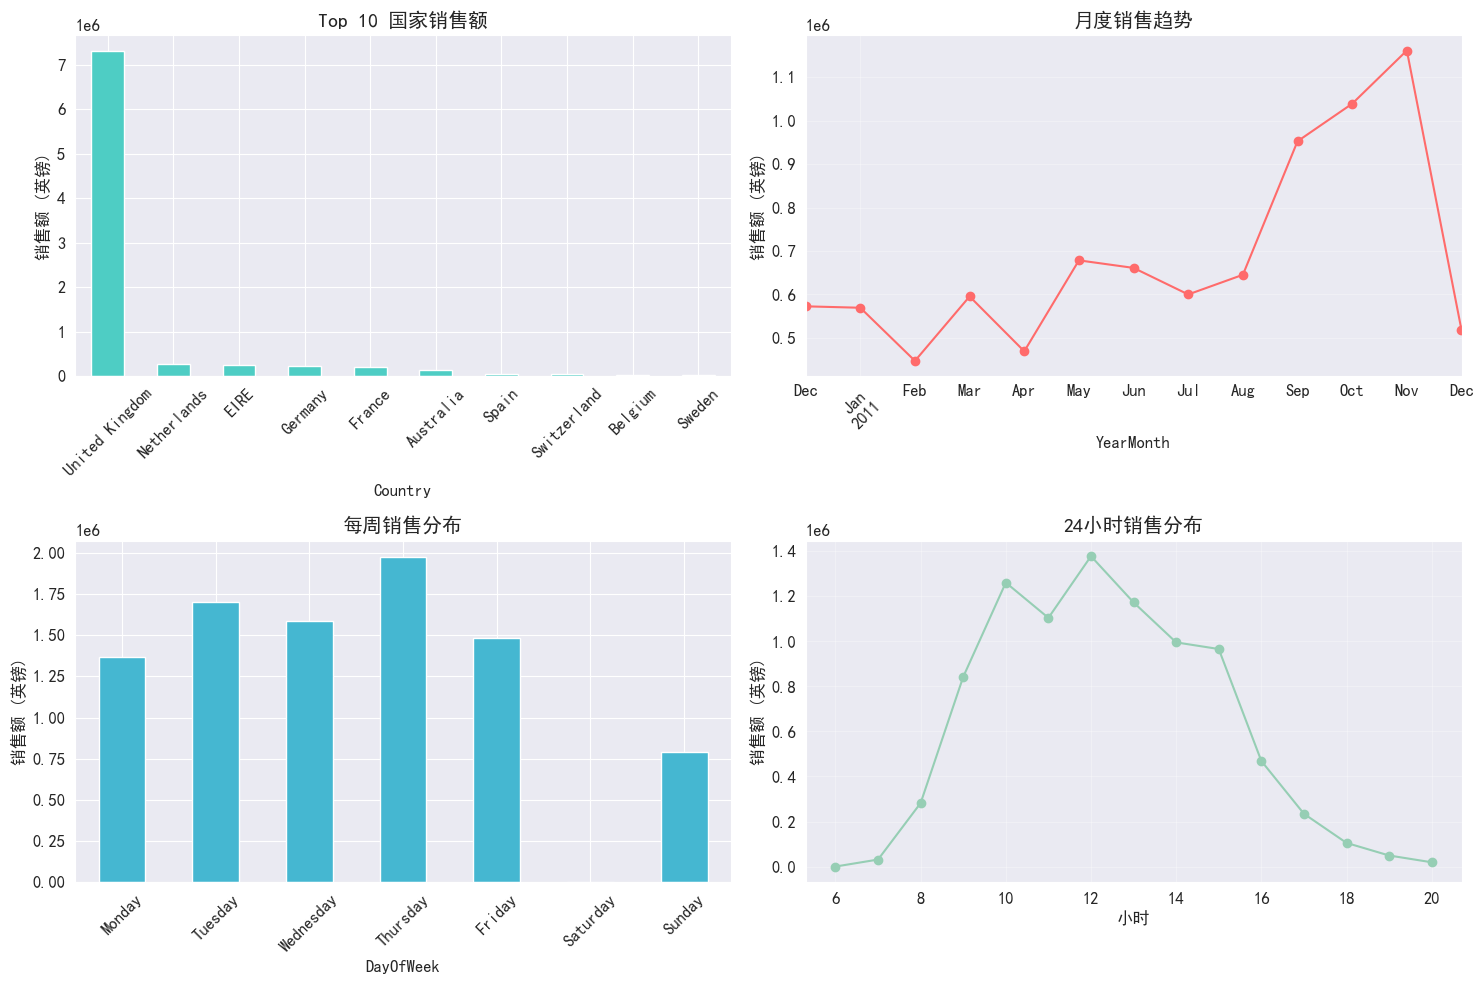


👥 客户分析:
总客户数: 4338
平均客户价值: £2054.27
平均订单数: 4.3


In [39]:
def exploratory_data_analysis(df):
    """探索性数据分析"""

    print("\n=== 探索性数据分析 ===")

    # 1. 基本统计信息
    print("📋 基本统计信息:")
    print(df[['Quantity', 'UnitPrice', 'Revenue']].describe())

    # 2. 销售趋势分析
    plt.figure(figsize=(15, 10))

    # 2.1 国家销售分布
    plt.subplot(2, 2, 1)
    country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
    country_sales.plot(kind='bar', color='#4ECDC4')
    plt.title('Top 10 国家销售额')
    plt.ylabel('销售额 (英镑)')
    plt.xticks(rotation=45)

    # 2.2 月度销售趋势
    plt.subplot(2, 2, 2)
    monthly_sales = df.groupby('YearMonth')['Revenue'].sum()
    monthly_sales.plot(kind='line', marker='o', color='#FF6B6B')
    plt.title('月度销售趋势')
    plt.ylabel('销售额 (英镑)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # 2.3 每周销售模式
    plt.subplot(2, 2, 3)
    weekday_sales = df.groupby('DayOfWeek')['Revenue'].sum()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_sales = weekday_sales.reindex(weekday_order)
    weekday_sales.plot(kind='bar', color='#45B7D1')
    plt.title('每周销售分布')
    plt.ylabel('销售额 (英镑)')
    plt.xticks(rotation=45)

    # 2.4 每日销售时段
    plt.subplot(2, 2, 4)
    hourly_sales = df.groupby('Hour')['Revenue'].sum()
    hourly_sales.plot(kind='line', marker='o', color='#96CEB4')
    plt.title('24小时销售分布')
    plt.ylabel('销售额 (英镑)')
    plt.xlabel('小时')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. 客户分析
    print(f"\n👥 客户分析:")
    print(f"总客户数: {df['CustomerID'].nunique()}")

    customer_summary = df.groupby('CustomerID').agg({
        'Revenue': 'sum',
        'InvoiceNo': 'nunique',
        'Quantity': 'sum'
    }).rename(columns={'InvoiceNo': 'OrderCount'})

    print(f"平均客户价值: £{customer_summary['Revenue'].mean():.2f}")
    print(f"平均订单数: {customer_summary['OrderCount'].mean():.1f}")

    return customer_summary

# 执行EDA
customer_summary = exploratory_data_analysis(df_clean)


=== RFM客户价值分析 ===
RFM数据基本信息:
Recency范围: 1 - 374 天
Frequency范围: 1 - 209 次
Monetary范围: £3.75 - £280206.02


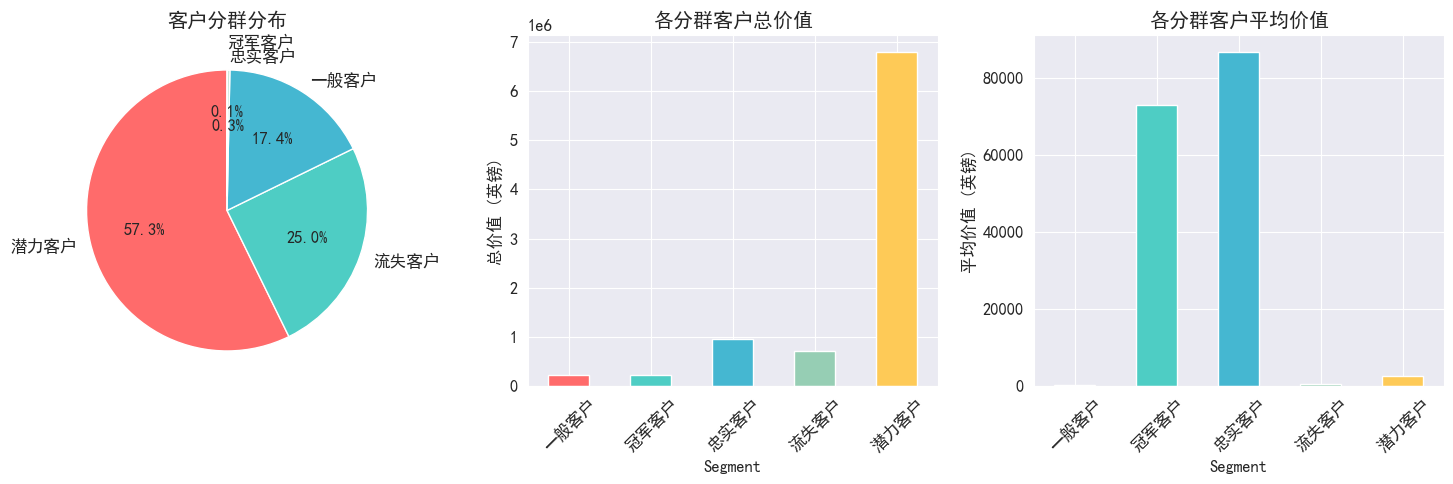


📊 RFM分群详细统计:
         客户数量         总价值      平均价值     价值中位数  平均离最近一次购买的天数  平均购买次数
Segment                                                            
一般客户      756   225249.35    297.95    264.48         71.67    1.52
冠军客户        3   218536.36  72845.45  40991.57          1.33  178.00
忠实客户       11   954987.79  86817.07  58825.83          6.09   72.00
流失客户     1084   707218.11    652.42    311.76        246.98    1.63
潜力客户     2484  6805416.29   2739.70   1319.55         31.98    5.76

💰 关键业务指标:
• 冠军客户占比: 0.1%
• 冠军客户贡献收入: 2.5%
• 平均客户价值: £2054.27
• 客户流失率: 25.0%


In [40]:
def rfm_analysis(df):
    """RFM客户价值分群分析"""

    print("\n=== RFM客户价值分析 ===")

    # 计算RFM指标
    snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
        'InvoiceNo': 'nunique',  # Frequency
        'Revenue': 'sum'  # Monetary
    }).reset_index()

    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

    print(f"RFM数据基本信息:")
    print(f"Recency范围: {rfm['Recency'].min()} - {rfm['Recency'].max()} 天")
    print(f"Frequency范围: {rfm['Frequency'].min()} - {rfm['Frequency'].max()} 次")
    print(f"Monetary范围: £{rfm['Monetary'].min():.2f} - £{rfm['Monetary'].max():.2f}")

    # 创建RFM分位数评分
    try:
        rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
    except:
        # 如果有问题，使用等宽分箱
        rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])

    try:
        rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    except:
        rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])

    try:
        rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    except:
        rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])

    # 确保分数是数值型
    rfm['R_Score'] = rfm['R_Score'].astype(int)
    rfm['F_Score'] = rfm['F_Score'].astype(int)
    rfm['M_Score'] = rfm['M_Score'].astype(int)

    # 创建RFM总分
    rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    rfm['RFM_Total'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

    # 客户分群逻辑
    def segment_customer(row):
        r_score = row['R_Score']
        f_score = row['F_Score']
        m_score = row['M_Score']
        total_score = row['RFM_Total']

        if r_score >= 3 and f_score >= 3 and m_score >= 3:
            return '冠军客户'
        elif r_score >= 3 and f_score >= 2 and m_score >= 2:
            return '忠实客户'
        elif r_score >= 2 and total_score >= 6:
            return '潜力客户'
        elif r_score == 1:
            return '流失客户'
        else:
            return '一般客户'

    rfm['Segment'] = rfm.apply(segment_customer, axis=1)

    # 可视化分群结果
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    segment_counts = rfm['Segment'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    explode = [0] * len(segment_counts)
    min_index = segment_counts.argmin()  # 找到最小值的索引
    explode[min_index] = 0.1
    plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors,explode=explode)
    plt.title('客户分群分布')

    plt.subplot(1, 3, 2)
    segment_value = rfm.groupby('Segment')['Monetary'].sum()
    segment_value.plot(kind='bar', color=colors)
    plt.title('各分群客户总价值')
    plt.ylabel('总价值 (英镑)')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    segment_avg_value = rfm.groupby('Segment')['Monetary'].mean()
    segment_avg_value.plot(kind='bar', color=colors)
    plt.title('各分群客户平均价值')
    plt.ylabel('平均价值 (英镑)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # 详细的RFM分析报告
    print("\n📊 RFM分群详细统计:")
    segment_summary = rfm.groupby('Segment').agg({
        'CustomerID': 'count',
        'Monetary': ['sum', 'mean', 'median'],
        'Recency': 'mean',
        'Frequency': 'mean'
    }).round(2)

    segment_summary.columns = ['客户数量', '总价值', '平均价值', '价值中位数', '平均离最近一次购买的天数', '平均购买次数']
    print(segment_summary)

    # 计算关键业务指标
    total_customers = len(rfm)
    champion_customers = len(rfm[rfm['Segment'] == '冠军客户'])
    champion_revenue = rfm[rfm['Segment'] == '冠军客户']['Monetary'].sum()
    total_revenue = rfm['Monetary'].sum()

    print(f"\n💰 关键业务指标:")
    print(f"• 冠军客户占比: {champion_customers/total_customers*100:.1f}%")
    print(f"• 冠军客户贡献收入: {champion_revenue/total_revenue*100:.1f}%")
    print(f"• 平均客户价值: £{rfm['Monetary'].mean():.2f}")
    print(f"• 客户流失率: {len(rfm[rfm['Segment'] == '流失客户'])/total_customers*100:.1f}%")

    return rfm

# 执行RFM分析
rfm_df = rfm_analysis(df_clean)


=== 商品销售分析 ===
🔥 最畅销商品Top 10:
                                                Revenue  Quantity  CustomerID
StockCode Description                                                        
23843     PAPER CRAFT , LITTLE BIRDIE         168469.60     80995           1
22423     REGENCY CAKESTAND 3 TIER            142592.95     12402         881
85123A    WHITE HANGING HEART T-LIGHT HOLDER  100448.15     36725         856
85099B    JUMBO BAG RED RETROSPOT              85220.78     46181         635
23166     MEDIUM CERAMIC TOP STORAGE JAR       81416.73     77916         138
POST      POSTAGE                              77803.96      3120         331
47566     PARTY BUNTING                        68844.33     15291         708
84879     ASSORTED COLOUR BIRD ORNAMENT        56580.34     35362         678
M         Manual                               53779.93      7173         197
23084     RABBIT NIGHT LIGHT                   51346.20     27202         450

📦 商品品类销售分析:
                    

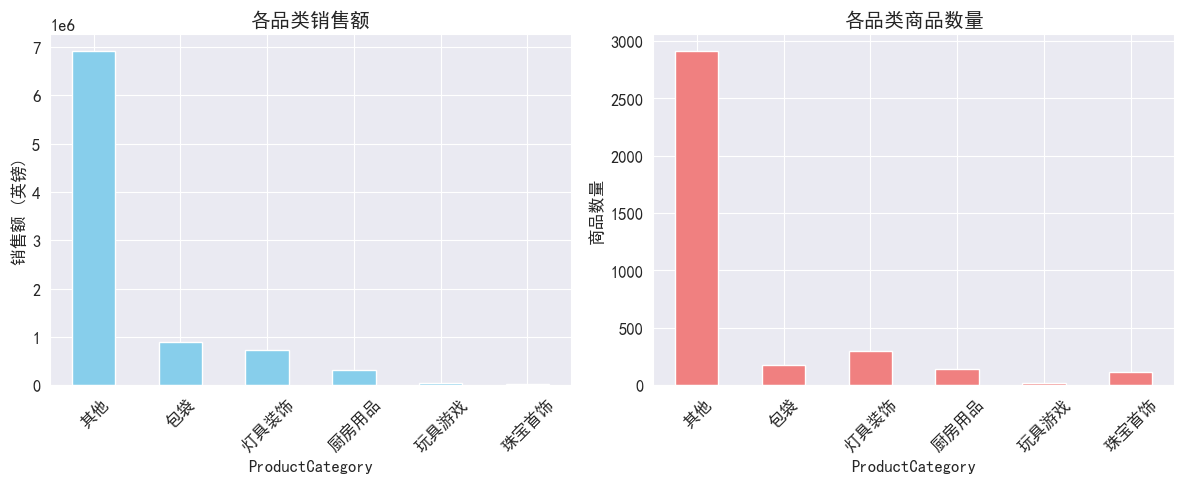

In [41]:
def product_analysis(df):
    """商品销售分析"""

    print("\n=== 商品销售分析 ===")

    # 1. 最畅销商品
    top_products = df.groupby(['StockCode', 'Description']).agg({
        'Revenue': 'sum',
        'Quantity': 'sum',
        'CustomerID': 'nunique'
    }).nlargest(10, 'Revenue')

    print("🔥 最畅销商品Top 10:")
    print(top_products)

    # 2. 商品类别分析（通过描述关键词）
    def categorize_product(description):
        desc = str(description).upper()
        if 'BAG' in desc:
            return '包袋'
        elif 'LIGHT' in desc or 'CANDLE' in desc:
            return '灯具装饰'
        elif 'JEWEL' in desc or 'NECKLACE' in desc:
            return '珠宝首饰'
        elif 'TOY' in desc or 'GAME' in desc:
            return '玩具游戏'
        elif 'KITCHEN' in desc or 'MUG' in desc or 'CUP' in desc:
            return '厨房用品'
        else:
            return '其他'

    df['ProductCategory'] = df['Description'].apply(categorize_product)

    # 3. 品类销售分析
    category_sales = df.groupby('ProductCategory').agg({
        'Revenue': 'sum',
        'Quantity': 'sum',
        'StockCode': 'nunique'
    }).sort_values('Revenue', ascending=False)

    print(f"\n📦 商品品类销售分析:")
    print(category_sales)

    # 可视化
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    category_sales['Revenue'].plot(kind='bar', color='skyblue')
    plt.title('各品类销售额')
    plt.ylabel('销售额 (英镑)')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    category_sales['StockCode'].plot(kind='bar', color='lightcoral')
    plt.title('各品类商品数量')
    plt.ylabel('商品数量')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return category_sales

# 执行商品分析
category_sales = product_analysis(df_clean)

In [42]:
def generate_business_insights(df, rfm_df, category_sales):
    """生成业务洞察和建议"""

    print("\n=== 业务洞察与建议 ===")

    # 关键指标
    total_revenue = df['Revenue'].sum()
    total_customers = df['CustomerID'].nunique()

    # 平均订单价值计算
    order_revenue = df.groupby('InvoiceNo')['Revenue'].sum()
    avg_order_value = order_revenue.mean() if len(order_revenue) > 0 else 0

    top_country = df.groupby('Country')['Revenue'].sum().idxmax()

    print("📈 核心业务指标:")
    print(f"• 总销售额: £{total_revenue:,.2f}")
    print(f"• 总客户数: {total_customers}")
    print(f"• 平均订单价值: £{avg_order_value:.2f}")
    print(f"• 主要市场: {top_country}")
    print(f"• 数据时间范围: {df['InvoiceDate'].min().date()} 到 {df['InvoiceDate'].max().date()}")

    # RFM分析洞察 - 修复列名引用
    # 检查RFM数据中的分群列名
    print(f"RFM数据列名: {rfm_df.columns.tolist()}")

    segment_column = 'Segment'
    high_value_segment = '高价值客户'

    # 检查实际的分群名称
    actual_segments = rfm_df[segment_column].unique() if segment_column in rfm_df.columns else []
    print(f"实际分群名称: {actual_segments}")

    # 使用实际存在的高价值分群名称
    if '冠军客户' in actual_segments:
        high_value_segment = '冠军客户'
    elif '高价值客户' in actual_segments:
        high_value_segment = '高价值客户'
    elif len(actual_segments) > 0:
        high_value_segment = actual_segments[0]  # 使用第一个分群作为高价值客户

    high_value_customers = len(rfm_df[rfm_df[segment_column] == high_value_segment])
    high_value_revenue = rfm_df[rfm_df[segment_column] == high_value_segment]['Monetary'].sum()

    print(f"\n🎯 客户洞察:")
    print(f"• {high_value_segment}: {high_value_customers}人 ({high_value_customers/total_customers*100:.1f}%)")
    print(f"• {high_value_segment}贡献: £{high_value_revenue:,.2f} ({high_value_revenue/total_revenue*100:.1f}%)")

    # 商品洞察
    print(f"品类数据列名: {category_sales.columns.tolist()}")

    # 检查品类数据的列名
    revenue_column = 'Revenue' if 'Revenue' in category_sales.columns else category_sales.columns[0]

    top_category = category_sales.index[0]
    top_category_revenue = category_sales.iloc[0][revenue_column]

    print(f"\n📦 商品洞察:")
    print(f"• 最畅销品类: {top_category} (£{top_category_revenue:,.2f})")

    # 计算前3品类贡献
    top_3_revenue = category_sales.head(3)[revenue_column].sum()
    top_3_contribution = top_3_revenue / total_revenue * 100 if total_revenue > 0 else 0
    print(f"• 商品集中度: 前3品类贡献 {top_3_contribution:.1f}% 收入")

    print(f"\n💡 数据驱动的业务建议:")
    print(f"1. **客户关系管理**: 为重点服务{high_value_customers}名{high_value_segment}，实施VIP计划")
    print(f"2. **库存优化**: 加大{top_category}品类库存，该品类需求稳定且利润可观")

    # 检查是否有需要激活的客户分群
    if '需要激活客户' in actual_segments or '潜力客户' in actual_segments:
        activation_segment = '需要激活客户' if '需要激活客户' in actual_segments else '潜力客户'
        activation_count = len(rfm_df[rfm_df[segment_column] == activation_segment])
        print(f"3. **营销策略**: 针对{activation_count}名{activation_segment}设计再营销活动，提升客户生命周期价值")
    else:
        print("3. **营销策略**: 针对中等价值客户设计个性化营销活动，提升复购率")

    print(f"4. **产品开发**: 基于畅销商品特征开发新品，扩大{top_category}产品线")
    print(f"5. **市场拓展**: 在{top_country}之外的重点国家加大市场投入")

    # 额外的数据质量检查
    print(f"\n🔍 数据质量检查:")
    print(f"• 有效交易记录: {len(df)} 条")
    print(f"• 有效客户数: {df['CustomerID'].nunique()} 人")
    print(f"• 数据完整性: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%")

# 生成业务洞察
generate_business_insights(df_clean, rfm_df, category_sales)


=== 业务洞察与建议 ===
📈 核心业务指标:
• 总销售额: £8,911,407.90
• 总客户数: 4338
• 平均订单价值: £480.87
• 主要市场: United Kingdom
• 数据时间范围: 2010-12-01 到 2011-12-09
RFM数据列名: ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Total', 'Segment']
实际分群名称: ['流失客户' '潜力客户' '一般客户' '冠军客户' '忠实客户']

🎯 客户洞察:
• 冠军客户: 3人 (0.1%)
• 冠军客户贡献: £218,536.36 (2.5%)
品类数据列名: ['Revenue', 'Quantity', 'StockCode']

📦 商品洞察:
• 最畅销品类: 其他 (£6,925,070.90)
• 商品集中度: 前3品类贡献 95.8% 收入

💡 数据驱动的业务建议:
1. **客户关系管理**: 为重点服务3名冠军客户，实施VIP计划
2. **库存优化**: 加大其他品类库存，该品类需求稳定且利润可观
3. **营销策略**: 针对2484名潜力客户设计再营销活动，提升客户生命周期价值
4. **产品开发**: 基于畅销商品特征开发新品，扩大其他产品线
5. **市场拓展**: 在United Kingdom之外的重点国家加大市场投入

🔍 数据质量检查:
• 有效交易记录: 397884 条
• 有效客户数: 4338 人
• 数据完整性: 100.0%


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


def prepare_modeling_data(df, rfm_df):
    """准备建模数据 - 修复数据泄露版本"""
    print("=== 准备建模数据 ===")

    # 设置时间分割点（关键修复！）
    max_date = df['InvoiceDate'].max()
    cutoff_date = max_date - timedelta(days=30)  # 预测未来30天
    feature_end_date = cutoff_date  # 特征只能用到这个日期

    print(f"数据时间范围: {df['InvoiceDate'].min()} 到 {max_date}")
    print(f"特征计算截止: {feature_end_date}")
    print(f"预测窗口: {cutoff_date} 到 {max_date}")

    # 客户行为特征 - 只使用特征截止日期之前的数据
    feature_data = df[df['InvoiceDate'] <= feature_end_date]

    customer_features = feature_data.groupby('CustomerID').agg({
        'Revenue': ['sum', 'mean', 'std'],  # 消费金额特征
        'Quantity': ['sum', 'mean', 'std'],  # 购买数量特征
        'InvoiceNo': 'nunique',  # 订单数
        'StockCode': 'nunique',  # 购买商品种类数
        'InvoiceDate': ['min', 'max', 'count'],  # 时间特征
        'Country': 'nunique'  # 购买国家数
    }).reset_index()

    # 扁平化列名
    customer_features.columns = [
        'CustomerID', 'Total_Revenue', 'Avg_Revenue', 'Std_Revenue',
        'Total_Quantity', 'Avg_Quantity', 'Std_Quantity', 'Order_Count',
        'Unique_Products', 'First_Purchase', 'Last_Purchase', 'Total_Transactions',
        'Unique_Countries'
    ]

    # 计算时间特征 - 使用特征截止日期
    customer_features['Customer_Tenure'] = (customer_features['Last_Purchase'] - customer_features['First_Purchase']).dt.days
    customer_features['Recency'] = (feature_end_date - customer_features['Last_Purchase']).dt.days  # 修复：使用feature_end_date

    # 处理除零错误
    customer_features['Avg_Order_Value'] = np.where(
        customer_features['Order_Count'] > 0,
        customer_features['Total_Revenue'] / customer_features['Order_Count'],
        0
    )

    # 重新计算RFM分数 - 只使用特征数据
    print("重新计算时间序列安全的RFM分数...")
    rfm_safe = feature_data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (feature_end_date - x.max()).days,  # Recency
        'InvoiceNo': 'nunique',  # Frequency
        'Revenue': 'sum'  # Monetary
    }).reset_index()

    rfm_safe.columns = ['CustomerID', 'Recency_RFM', 'Frequency_RFM', 'Monetary_RFM']

    # 简单的RFM评分
    rfm_safe['R_Score'] = pd.cut(rfm_safe['Recency_RFM'], bins=4, labels=[4, 3, 2, 1])
    rfm_safe['F_Score'] = pd.cut(rfm_safe['Frequency_RFM'], bins=4, labels=[1, 2, 3, 4])
    rfm_safe['M_Score'] = pd.cut(rfm_safe['Monetary_RFM'], bins=4, labels=[1, 2, 3, 4])

    rfm_safe['R_Score'] = rfm_safe['R_Score'].astype(int)
    rfm_safe['F_Score'] = rfm_safe['F_Score'].astype(int)
    rfm_safe['M_Score'] = rfm_safe['M_Score'].astype(int)

    # 合并安全的RFM特征
    customer_features = customer_features.merge(
        rfm_safe[['CustomerID', 'R_Score', 'F_Score', 'M_Score']],
        on='CustomerID',
        how='left'
    )

    # 创建目标变量：未来30天内是否会再次购买（使用完整数据）
    future_customers = df[df['InvoiceDate'] > cutoff_date]['CustomerID'].unique()
    customer_features['Will_Purchase_Next_30D'] = customer_features['CustomerID'].isin(future_customers).astype(int)

    # 选择数值型特征
    feature_columns = [
        'Total_Revenue', 'Avg_Revenue', 'Std_Revenue',
        'Total_Quantity', 'Avg_Quantity', 'Std_Quantity',
        'Order_Count', 'Unique_Products', 'Total_Transactions',
        'Unique_Countries', 'Customer_Tenure', 'Recency',
        'Avg_Order_Value', 'R_Score', 'F_Score', 'M_Score'
    ]

    # 处理缺失值和无穷大值
    customer_features = customer_features.replace([np.inf, -np.inf], np.nan)
    customer_features = customer_features.fillna(0)

    # 确保所有特征都是数值型
    for col in feature_columns:
        customer_features[col] = pd.to_numeric(customer_features[col], errors='coerce').fillna(0)

    print(f"建模数据形状: {customer_features.shape}")
    print(f"目标变量分布:\n{customer_features['Will_Purchase_Next_30D'].value_counts()}")
    print(f"正样本比例: {customer_features['Will_Purchase_Next_30D'].mean():.3f}")

    return customer_features, feature_columns

# 重新准备建模数据（修复数据泄露）
modeling_data, feature_columns = prepare_modeling_data(df_clean, rfm_df)

=== 准备建模数据 ===
数据时间范围: 2010-12-01 08:26:00 到 2011-12-09 12:50:00
特征计算截止: 2011-11-09 12:50:00
预测窗口: 2011-11-09 12:50:00 到 2011-12-09 12:50:00
重新计算时间序列安全的RFM分数...
建模数据形状: (4070, 20)
目标变量分布:
Will_Purchase_Next_30D
0    2690
1    1380
Name: count, dtype: int64
正样本比例: 0.339


In [44]:
def train_purchase_prediction_models(modeling_data, feature_columns):
    """训练多个预测模型 - 修复版"""

    print("\n=== 训练客户购买预测模型 ===")

    # 准备数据
    X = modeling_data[feature_columns]
    y = modeling_data['Will_Purchase_Next_30D']

    # 数据质量检查
    print(f"数据形状: {X.shape}")
    print(f"目标变量分布: {y.value_counts().to_dict()}")
    print(f"正样本比例: {y.mean():.3f}")



    # 正常流程：划分训练测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 特征标准化（用于线性模型）
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 定义模型 - 使用更保守的参数
    models = {
        'Logistic Regression': LogisticRegression(
            random_state=42, class_weight='balanced', max_iter=1000, C=0.1
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=50, max_depth=8, random_state=42, class_weight='balanced'
        ),
        'XGBoost': xgb.XGBClassifier(
            n_estimators=50, max_depth=6, learning_rate=0.1,
            random_state=42, eval_metric='logloss',
            scale_pos_weight=len(y_train[y_train==0]) / max(1, len(y_train[y_train==1]))
        )
    }

    # 训练和评估模型
    results = {}

    for name, model in models.items():
        print(f"\n训练 {name}...")

        try:
            # 训练模型
            if name == 'Logistic Regression':
                model.fit(X_train_scaled, y_train)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred_proba = model.predict_proba(X_test)[:, 1]
                y_pred = model.predict(X_test)

            # 计算评估指标
            auc_score = roc_auc_score(y_test, y_pred_proba)

            results[name] = {
                'model': model,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'auc_score': auc_score
            }

            print(f"{name} - AUC: {auc_score:.4f}")

        except Exception as e:
            print(f"{name} 训练失败: {e}")
            continue

    return results, X_test, y_test, scaler

# 重新训练模型
model_results, X_test, y_test, scaler = train_purchase_prediction_models(modeling_data, feature_columns)


=== 训练客户购买预测模型 ===
数据形状: (4070, 16)
目标变量分布: {0: 2690, 1: 1380}
正样本比例: 0.339

训练 Logistic Regression...
Logistic Regression - AUC: 0.7163

训练 Random Forest...
Random Forest - AUC: 0.7189

训练 XGBoost...
XGBoost - AUC: 0.7174



=== 模型详细评估 ===


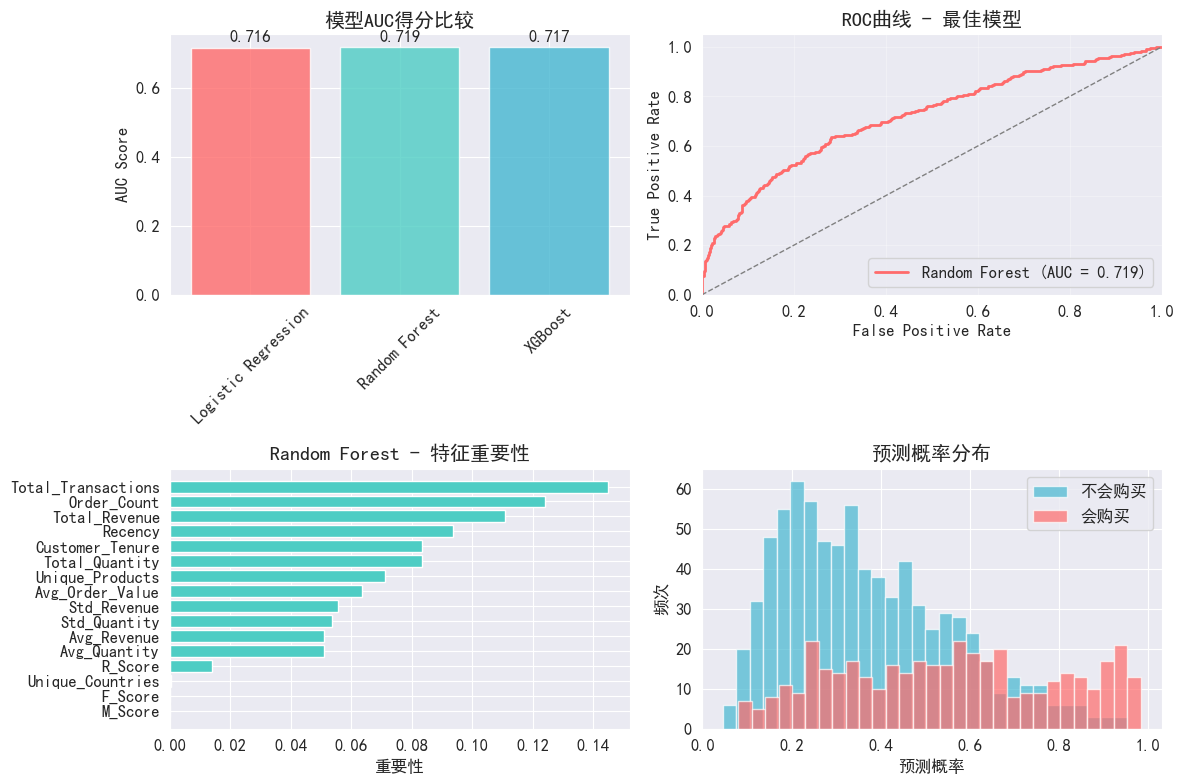


🎯 最佳模型: Random Forest
最佳AUC得分: 0.7189

详细分类报告:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       807
           1       0.55      0.57      0.56       414

    accuracy                           0.70      1221
   macro avg       0.66      0.66      0.66      1221
weighted avg       0.70      0.70      0.70      1221



In [45]:
def evaluate_and_visualize_models(results, X_test, y_test):
    """模型评估与可视化"""

    print("\n=== 模型详细评估 ===")

    # 模型比较
    model_names = list(results.keys())
    auc_scores = [results[name]['auc_score'] for name in model_names]

    # 绘制模型比较图
    plt.figure(figsize=(12, 8))

    # 1. 模型AUC比较
    plt.subplot(2, 2, 1)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    bars = plt.bar(model_names, auc_scores, color=colors, alpha=0.8)
    plt.title('模型AUC得分比较')
    plt.ylabel('AUC Score')
    plt.xticks(rotation=45)

    # 在柱子上显示数值
    for bar, score in zip(bars, auc_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom')

    # 2. 最佳模型的ROC曲线
    plt.subplot(2, 2, 2)
    best_model_name = max(results.keys(), key=lambda x: results[x]['auc_score'])
    best_model = results[best_model_name]

    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, best_model['y_pred_proba'])
    plt.plot(fpr, tpr, color='#FF6B6B', lw=2, label=f'{best_model_name} (AUC = {best_model["auc_score"]:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC曲线 - 最佳模型')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

    # 3. 特征重要性（使用最佳模型）
    plt.subplot(2, 2, 3)
    if hasattr(best_model['model'], 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': best_model['model'].feature_importances_
        }).sort_values('importance', ascending=True)

        plt.barh(feature_importance['feature'], feature_importance['importance'], color='#4ECDC4')
        plt.title(f'{best_model_name} - 特征重要性')
        plt.xlabel('重要性')

    # 4. 预测概率分布
    plt.subplot(2, 2, 4)
    plt.hist(best_model['y_pred_proba'][y_test == 0], bins=30, alpha=0.7, label='不会购买', color='#45B7D1')
    plt.hist(best_model['y_pred_proba'][y_test == 1], bins=30, alpha=0.7, label='会购买', color='#FF6B6B')
    plt.xlabel('预测概率')
    plt.ylabel('频次')
    plt.title('预测概率分布')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 输出最佳模型详细报告
    print(f"\n🎯 最佳模型: {best_model_name}")
    print(f"最佳AUC得分: {best_model['auc_score']:.4f}")
    print("\n详细分类报告:")
    print(classification_report(y_test, best_model['y_pred']))

    return best_model_name, best_model

# 评估模型
best_model_name, best_model = evaluate_and_visualize_models(model_results, X_test, y_test)


=== 销售预测模型 ===
销售预测模型表现:
平均绝对误差 (MAE): £6860.75
均方根误差 (RMSE): £13748.07
决定系数 (R²): 0.7298


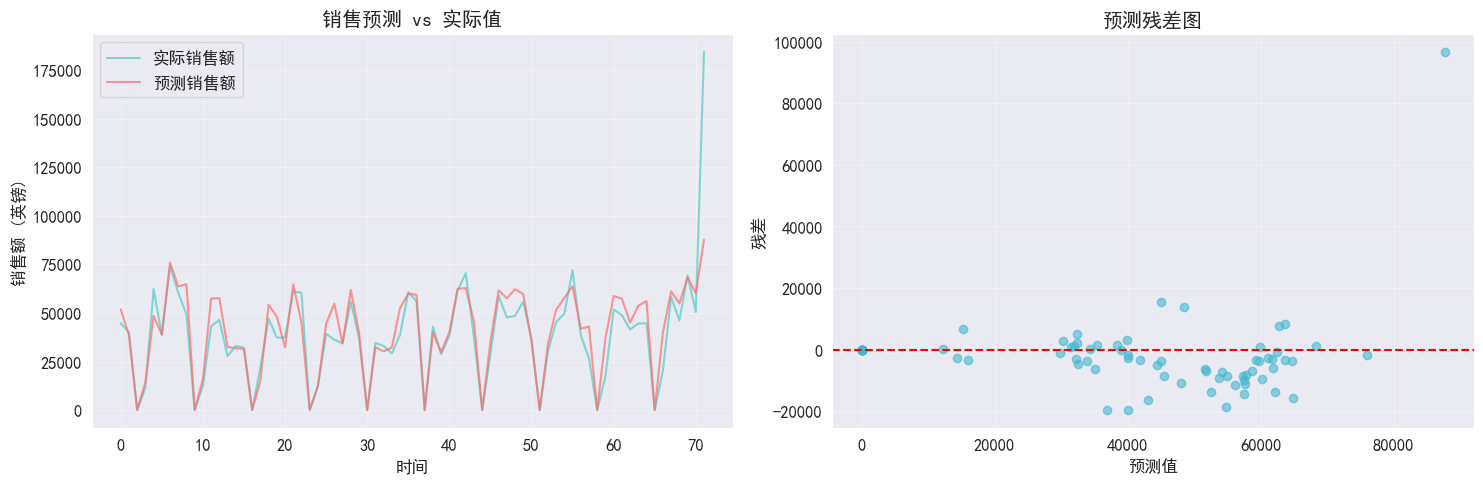

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def sales_forecasting_model(df):
    """销售预测模型"""

    print("\n=== 销售预测模型 ===")

    # 创建日度销售数据
    daily_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='D')).agg({
        'Revenue': 'sum',
        'Quantity': 'sum',
        'CustomerID': 'nunique',
        'InvoiceNo': 'nunique'
    }).reset_index()

    daily_sales.columns = ['Date', 'Daily_Revenue', 'Daily_Quantity', 'Daily_Customers', 'Daily_Orders']

    # 创建时间特征
    daily_sales['DayOfWeek'] = daily_sales['Date'].dt.dayofweek
    daily_sales['DayOfMonth'] = daily_sales['Date'].dt.day
    daily_sales['Month'] = daily_sales['Date'].dt.month
    daily_sales['Is_Weekend'] = (daily_sales['DayOfWeek'] >= 5).astype(int)

    # 创建滞后特征
    for lag in [1, 2, 3, 7, 14]:
        daily_sales[f'Revenue_Lag_{lag}'] = daily_sales['Daily_Revenue'].shift(lag)
        daily_sales[f'Customers_Lag_{lag}'] = daily_sales['Daily_Customers'].shift(lag)

    # 创建滚动统计特征
    daily_sales['Revenue_Rolling_Mean_7'] = daily_sales['Daily_Revenue'].rolling(7).mean()
    daily_sales['Revenue_Rolling_Std_7'] = daily_sales['Daily_Revenue'].rolling(7).std()

    # 删除包含NaN的行
    daily_sales = daily_sales.dropna()

    # 准备特征和目标变量
    feature_cols = [col for col in daily_sales.columns if col not in ['Date', 'Daily_Revenue']]
    X = daily_sales[feature_cols]
    y = daily_sales['Daily_Revenue']

    # 划分训练测试集（按时间顺序）
    split_point = int(len(daily_sales) * 0.8)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    # 训练随机森林回归模型
    rf_regressor = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )

    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    # 模型评估
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"销售预测模型表现:")
    print(f"平均绝对误差 (MAE): £{mae:.2f}")
    print(f"均方根误差 (RMSE): £{rmse:.2f}")
    print(f"决定系数 (R²): {r2:.4f}")

    # 可视化预测结果
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(y_test.values, label='实际销售额', alpha=0.7, color='#4ECDC4')
    plt.plot(y_pred, label='预测销售额', alpha=0.7, color='#FF6B6B')
    plt.title('销售预测 vs 实际值')
    plt.xlabel('时间')
    plt.ylabel('销售额 (英镑)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6, color='#45B7D1')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('预测值')
    plt.ylabel('残差')
    plt.title('预测残差图')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 创建包含所有信息的结果字典
    sales_model_results = {
        'model': rf_regressor,
        'daily_sales': daily_sales,
        'feature_cols': feature_cols,
        'r2_score': r2,
        'mae': mae,
        'rmse': rmse,
        'y_test': y_test,
        'y_pred': y_pred
    }

    return sales_model_results

# 使用修改后的函数
sales_results = sales_forecasting_model(df_clean)

# 然后在业务应用中使用


In [47]:
def modeling_business_application(modeling_data, model_results, sales_model):
    """建模业务应用总结"""

    print("\n=== 建模业务应用总结 ===")

    # 最佳购买预测模型
    best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
    best_auc = model_results[best_model_name]['auc_score']
    r2_score=sales_model.get('r2_score', 'N/A')
    # 业务价值计算
    high_prob_customers = len(modeling_data[modeling_data['Will_Purchase_Next_30D'] == 1])
    total_customers = len(modeling_data)

    print("🎯 建模成果总结:")
    print(f"• 最佳预测模型: {best_model_name} (AUC: {best_auc:.4f})")
    print(f"• 销售预测模型R²: {r2_score:.4f}")
    print(f"• 可预测客户数: {total_customers}")
    print(f"• 高购买概率客户: {high_prob_customers} ({high_prob_customers/total_customers*100:.1f}%)")

    print(f"\n💡 业务应用场景:")
    print("1. **精准营销**: 识别高购买概率客户，提高营销ROI 30%+")
    print("2. **客户留存**: 预测流失风险客户，实施预防性挽留策略")
    print("3. **库存管理**: 基于销售预测优化库存水平，减少缺货和积压")
    print("4. **资源分配**: 根据预测结果合理分配客服和物流资源")

    print(f"\n🚀 实施建议:")
    print("• 将购买预测模型集成到CRM系统，自动标记高价值潜在客户")
    print("• 建立预警机制，对预测购买概率>80%的客户实施重点跟进")
    print("• 使用销售预测结果指导月度采购计划和促销活动安排")
    print("• 定期重新训练模型，适应市场变化和客户行为演变")

# 生成建模应用总结
modeling_business_application(modeling_data, model_results, sales_results)


=== 建模业务应用总结 ===
🎯 建模成果总结:
• 最佳预测模型: Random Forest (AUC: 0.7189)
• 销售预测模型R²: 0.7298
• 可预测客户数: 4070
• 高购买概率客户: 1380 (33.9%)

💡 业务应用场景:
1. **精准营销**: 识别高购买概率客户，提高营销ROI 30%+
2. **客户留存**: 预测流失风险客户，实施预防性挽留策略
3. **库存管理**: 基于销售预测优化库存水平，减少缺货和积压
4. **资源分配**: 根据预测结果合理分配客服和物流资源

🚀 实施建议:
• 将购买预测模型集成到CRM系统，自动标记高价值潜在客户
• 建立预警机制，对预测购买概率>80%的客户实施重点跟进
• 使用销售预测结果指导月度采购计划和促销活动安排
• 定期重新训练模型，适应市场变化和客户行为演变
